* We have dataset of Twitter tweets from `@dog_rates` also known as `WeRateDogs`.
* Rating has denominator of 10 and numerator is more than 10.
* We have a information about rating, dog names and dog stages
    - Dog stages can be, `doggo`: A big pupper, usually older `pupper`: Small doggo, usually younger. `puppo`: transition phase between pupper and doggo. `blep`: Subtle act that occurs without the knowledge of the one who slips , `snoot`: Nose of dog , `floof`: any dog with excess fur

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import os
%matplotlib inline
sns.set()

# Gather data

In [2]:
dog_tweets = pd.read_csv("data/twitter-archive-enhanced.csv")

In [3]:
dog_tweets.shape

(2356, 17)

In [4]:
dog_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Download and save image prediction file

In [5]:
predictions = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [6]:
home_dir = os.getcwd()

In [7]:
os.chdir("./data")

In [8]:
with open("image_prediction.tsv", 'w') as f:
    f.write(predictions.text)    

In [9]:
dog_prediction = pd.read_csv("image_prediction.tsv", sep='\t')

In [10]:
dog_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
dog_prediction.shape

(2075, 12)

In [13]:
os.chdir(home_dir)

### Get retweet count and 

In [14]:
import tweepy
consumer_key = 'ZBpgYUPQN2KDLBp0LmxbfRtuO'
consumer_secret = '5tByljB0LthtikqysqMgsE5baUojk9srVN16R9YjXv2cLa9iCk'
access_token = '2816475186-7lgYd15gwDmuj9IuR8cxEXZqObgAeaWkdk6i9EH'
access_secret = 'p7USFEkaweGErcwDWYnVXxQnqk42on672d5nmMJ2z1Vu1'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [15]:
os.chdir("./data")

In [16]:
with open("tweet_json.txt", "a+") as fd:
    for tweet_id in dog_tweets.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode="extended")
            fd.write(json.dumps(tweet._json))
            fd.write("\n")
        except tweepy.TweepError:
            print("{} data not available".format(tweet_id))

888202515573088257 data not available
873697596434513921 data not available
872668790621863937 data not available
872261713294495745 data not available
869988702071779329 data not available
866816280283807744 data not available
861769973181624320 data not available
856602993587888130 data not available
851953902622658560 data not available
845459076796616705 data not available
844704788403113984 data not available
842892208864923648 data not available
837366284874571778 data not available
837012587749474308 data not available
829374341691346946 data not available
827228250799742977 data not available
812747805718642688 data not available
802247111496568832 data not available
779123168116150273 data not available
775096608509886464 data not available
770743923962707968 data not available
760153949710192640 data not available


Rate limit reached. Sleeping for: 550


754011816964026368 data not available
680055455951884288 data not available


Rate limit reached. Sleeping for: 743


In [17]:
with open('retweet_likes.csv', 'a+') as file:
    with open('tweet_json.txt', 'r') as fd:
        for tweet_data in fd:
            json_data = json.loads(tweet_data)
            file.write(json_data["id_str"] + "," + str(json_data["retweet_count"]) + "," + 
                       str(json_data["favorite_count"]) + "\n")

In [18]:
retweet_like = pd.read_csv("retweet_likes.csv", header=None)

In [19]:
retweet_like.columns = ["tweet_id", "retweet_count", "favorite_count"]
retweet_like.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7907,37038
1,892177421306343426,5875,31874
2,891815181378084864,3878,24005
3,891689557279858688,8062,40374
4,891327558926688256,8745,38584


In [20]:
retweet_like.shape

(2332, 3)

In [21]:
os.chdir(home_dir)

--------------

# Assess Data

#### Is there any duplicate tweet data?

In [22]:
retweet_like.tweet_id.duplicated().sum()

0

In [23]:
dog_prediction.tweet_id.duplicated().sum()

0

In [24]:
dog_tweets.tweet_id.duplicated().sum()

0

#### Check for data types

In [25]:
dog_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [26]:
dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* `tweet_id` should be string, as it does not make sense to perform arithmetic operation on it.

In [27]:
retweet_like.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


* Again, `tweet_id` should be string.

In [28]:
dog_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
dog_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* `tweet_id` should be string.
* `timestamp` and `retweeted_status_timestamp` data type should be datetime, not an object.

#### Check for null values

In [30]:
dog_tweets.shape

(2356, 17)

In [31]:
dog_tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

* Majority of data in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are missing, so best bet would be to drop those columns.

In [32]:
dog_tweets.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [33]:
dog_tweets.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [34]:
dog_tweets.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [35]:
dog_tweets.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

* `name`, `doggo`, `floofer`, `pupper`, `puppo` has None denoted as string, so which avoid us from finding NaN values directly

In [36]:
retweet_like.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [37]:
dog_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
dog_tweets[dog_tweets.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [39]:
dog_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

* We also have to handle `rating_numerator` values less than 10 and some extremes. Also `rating_denominator` with values other than 10.

In [40]:
dog_tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* We can clean `source` columns to designate proper source of the tweet

In [41]:
(dog_tweets.name == 'None').sum()

745

In [42]:
dog_tweets[(dog_tweets.doggo == 'None') & (dog_tweets.floofer == 'None') & 
           (dog_tweets.pupper == 'None') & (dog_tweets.puppo == 'None')].shape

(1976, 17)

* For most of the records, we do not have available entries.

* Also, we have to combine dog types to single column, then change it's type to category which will significantly reduce memory usage.

In [43]:
mask = dog_tweets[['doggo', 'pupper', 'floofer', 'puppo']] != 'None'

In [44]:
mask = mask.sum(axis = 1)

In [45]:
dog_tweets[mask > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


* These entries are having multiple dog age type. We will get rid of it, so that we can easily melt the columns

#### Check `name` columns values in `dog_tweets` dataframe

In [46]:
pd.options.display.max_rows=1000

In [47]:
dog_tweets.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Tucker             10
Lola               10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
Buddy               7
Bailey              7
Toby                7
Daisy               7
an                  7
Oscar               6
Bella               6
Koda                6
Dave                6
Rusty               6
Jax                 6
Jack                6
Leo                 6
Milo                6
Stanley             6
Scout               6
Louis               5
Larry               5
Sunny               5
George              5
Finn                5
Gus                 5
Chester             5
Bentley             5
Phil                5
very                5
Sammy               5
Oakley              5
Alfie               5
Maddie              4
Loki                4
just                4
Chip      

In [48]:
dog_tweets.name[dog_tweets.name.str.len() <= 2].value_counts()

a     55
Bo     9
an     7
my     1
Jo     1
JD     1
Mo     1
by     1
O      1
Ed     1
Al     1
Name: name, dtype: int64

* Make all names Title case
* Name like a, an, by, the, not, O, officially, all, just, very, one, quite, mad, this, my looks odd. We have to clean them.

#### Check for tidiness (structural issues)
* In `dog_tweets` dataframe, there are information about tweet and also about dog ratings and its breed. We should make 2 different dataframe for those.
* In `dog_prediction` there are variables in a column name `p1`, `p2` and `p3`. we should melt them. 

* To summarize,
    - In `dog_tweets` dataframe,
        - Convert type of `tweet_id` to string
        - We need to convert data type of `timestamp` and `retweeted_status_timestamp` to datetime
        - Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`
        - Clean `source` columns to designate proper source of the tweet
        - Clean `name`.
        - Properly denote null values for `name`, `doggo`, `floofer`, `pupper`, `puppo`.
        - Handle `rating_denominator` and `rating_numerator` bad values.
        - Get rid of records which has multiple dog age type.
        - Separate tweet data and ranking data
        - Melt dog type to single column `types`
        - Combine `dog_tweets` and `retweet_likes` dataframes
    - In `dog_prediction` dataframe,
        - Convert type of `tweet_id` to string
        - Melt dataframe
    - In `retweet_like` dataframe
        - Convert type of `tweet_id` to string

-------------

# Clean data

In [49]:
dog_prediction_cleaned = dog_prediction.copy(deep=True)
retweet_like_cleaned = retweet_like.copy(deep=True)

#### Properly denote null values for `name`, `doggo`, `floofer`, `pupper`, `puppo`
* Let's directly mention it as `na_values` in `read_csv` function when we read it.

In [50]:
dog_tweets_cleaned = pd.read_csv("data/twitter-archive-enhanced.csv", na_values = 'None')

In [51]:
dog_tweets_cleaned.name.isna().sum()

745

In [52]:
dog_tweets_cleaned.doggo.isna().sum()

2259

In [53]:
dog_tweets_cleaned.floofer.isna().sum()

2346

In [54]:
dog_tweets_cleaned.pupper.isna().sum()

2099

In [55]:
dog_tweets_cleaned.puppo.isna().sum()

2326

In [56]:
dog_tweets_cleaned.puppo.value_counts(dropna=False)

NaN      2326
puppo      30
Name: puppo, dtype: int64

In [57]:
dog_tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

#### Convert type of `tweet_id` to string

In [58]:
dog_tweets_cleaned.tweet_id = dog_tweets_cleaned.tweet_id.astype(str)
retweet_like_cleaned.tweet_id = retweet_like_cleaned.tweet_id.astype(str)
dog_prediction_cleaned.tweet_id = dog_prediction_cleaned.tweet_id.astype(str)

In [59]:
retweet_like_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null object
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Convert data type of `timestamp` and `retweeted_status_timestamp` to datetime

In [60]:
dog_tweets_cleaned.timestamp = pd.to_datetime(dog_tweets_cleaned.timestamp)

In [61]:
dog_tweets_cleaned.timestamp.isna().sum()

0

In [62]:
dog_tweets_cleaned.retweeted_status_timestamp.isna().sum()

2175

In [63]:
dog_tweets_cleaned.retweeted_status_timestamp = pd.to_datetime(dog_tweets_cleaned.retweeted_status_timestamp)

In [64]:
dog_tweets_cleaned.retweeted_status_timestamp.isna().sum()

2175

In [65]:
dog_tweets_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [66]:
dog_tweets_cleaned[['timestamp', 'retweeted_status_timestamp', 'tweet_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
timestamp                     2356 non-null datetime64[ns]
retweeted_status_timestamp    181 non-null datetime64[ns]
tweet_id                      2356 non-null object
dtypes: datetime64[ns](2), object(1)
memory usage: 55.3+ KB


In [67]:
dog_prediction_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


####  Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`

In [68]:
dog_tweets_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True, axis=1)

In [69]:
dog_tweets_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Clean `source` columns to designate proper source of the tweet

In [70]:
dog_tweets_cleaned.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [71]:
mapping = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':"IPhone", 
           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':"Vine",
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':"Web Client",
           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':"TweetDeck"}
dog_tweets_cleaned.source = dog_tweets_cleaned.source.map(mapping)

In [72]:
dog_tweets_cleaned.source.value_counts()

IPhone        2221
Vine            91
Web Client      33
TweetDeck       11
Name: source, dtype: int64

#### Clean `name`

In [73]:
dog_tweets_cleaned.name = dog_tweets_cleaned.name.str.title()

In [74]:
dog_tweets_cleaned.name.value_counts(dropna=False)

NaN               745
A                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Tucker             10
Lola               10
Penny              10
Winston             9
Bo                  9
The                 8
Sadie               8
Bailey              7
An                  7
Toby                7
Buddy               7
Daisy               7
Bella               6
Milo                6
Rusty               6
Leo                 6
Jack                6
Jax                 6
Stanley             6
Scout               6
Oscar               6
Dave                6
Koda                6
Oakley              5
Sammy               5
Chester             5
Bentley             5
Alfie               5
Louis               5
Very                5
Finn                5
Gus                 5
George              5
Sunny               5
Phil                5
Larry               5
Maggie              4
Brody               4
Gerald              4
Carl      

In [75]:
bad_name = ['A', 'An', 'By', 'The', 'Not', 'O', 'Officially', 'All', 'Just', 'Very', 'One', 'Quite', 'Mad', 'This', 'My', 'Old']

In [76]:
def cleanName(name):
    if name in bad_name:
        return None
    else:
        return name

In [77]:
dog_tweets_cleaned.name = dog_tweets_cleaned.name.apply(cleanName)

In [78]:
dog_tweets_cleaned.name.isna().sum()

843

#### Handle `rating_denominator` and `rating_numerator` bad values.

In [79]:
dog_tweets_cleaned.shape

(2356, 12)

In [80]:
dog_tweets_cleaned.rating_denominator[dog_tweets_cleaned.rating_denominator != 10].shape

(23,)

In [81]:
idx = dog_tweets_cleaned.rating_denominator[dog_tweets_cleaned.rating_denominator != 10].index

In [82]:
dog_tweets_cleaned.drop(idx, inplace=True)

In [83]:
dog_tweets_cleaned.shape

(2333, 12)

In [84]:
dog_tweets_cleaned.rating_numerator[dog_tweets_cleaned.rating_numerator > 20].shape

(9,)

In [85]:
dog_tweets_cleaned.rating_numerator[dog_tweets_cleaned.rating_numerator < 10].shape

(434,)

* Score is often more than 10/10. If we all these bad valued records, we will loose 20% of data. Let's keep it as it is, we will decide in future if we really need to handle it or not.

#### Get rid of records which has multiple dog age type.

In [86]:
mask = dog_tweets_cleaned[['doggo', 'pupper', 'floofer', 'puppo']].notnull()
mask = mask.sum(axis = 1)
idx = dog_tweets_cleaned[mask > 1].index

In [87]:
dog_tweets_cleaned.shape

(2333, 12)

In [88]:
dog_tweets_cleaned.drop(idx, inplace=True)

In [89]:
dog_tweets_cleaned.shape

(2319, 12)

### Separate tweet data and ranking data

In [90]:
dog_tweets_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,IPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,IPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [91]:
dog_ratings = dog_tweets_cleaned.iloc[:, [0, 5, 6, 7, 8, 9, 10, 11]]

In [92]:
dog_ratings.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,12,10,Franklin,NaN,NaN,NaN,NaN


In [93]:
dog_tweets_cleaned = dog_tweets_cleaned.iloc[:, :5]

In [94]:
dog_tweets_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls
0,892420643555336193,2017-08-01 16:23:56,IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,2017-07-30 15:58:51,IPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,2017-07-29 16:00:24,IPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...


#### Melt dog type to single column types

In [95]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2319 non-null object
rating_numerator      2319 non-null int64
rating_denominator    2319 non-null int64
name                  1506 non-null object
doggo                 83 non-null object
floofer               9 non-null object
pupper                245 non-null object
puppo                 29 non-null object
dtypes: int64(2), object(6)
memory usage: 163.1+ KB


In [96]:
def getAgeCategory(row):
    if row["floofer"] == "floofer":
        return "floofer"
    elif row["doggo"] == "doggo":
        return "doggo"
    elif row["pupper"] == "pupper":
        return "pupper"
    elif row["puppo"] == "puppo":
        return "puppo"
    else:
        return None

In [97]:
dog_ratings.puppo.value_counts()

puppo    29
Name: puppo, dtype: int64

In [98]:
dog_ratings.doggo.value_counts()

doggo    83
Name: doggo, dtype: int64

In [99]:
dog_ratings.floofer.value_counts()

floofer    9
Name: floofer, dtype: int64

In [100]:
dog_ratings['age_category'] = dog_ratings.apply(getAgeCategory, axis=1)

In [101]:
dog_ratings.age_category.value_counts(dropna=False)

NaN        1953
pupper      245
doggo        83
puppo        29
floofer       9
Name: age_category, dtype: int64

In [102]:
dog_ratings.drop(["floofer", "doggo", "pupper", "puppo"], axis=1, inplace=True)

In [103]:
dog_ratings.head()

,tweet_id,rating_numerator,rating_denominator,name,age_category
0,892420643555336193,13,10,Phineas,None
1,892177421306343426,13,10,Tilly,None
2,891815181378084864,12,10,Archie,None
3,891689557279858688,13,10,Darla,None
4,891327558926688256,12,10,Franklin,None


#### Change  `age_category` type to category

In [104]:
dog_ratings.age_category = dog_ratings.age_category.astype('category')

In [105]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id              2319 non-null object
rating_numerator      2319 non-null int64
rating_denominator    2319 non-null int64
name                  1506 non-null object
age_category          366 non-null category
dtypes: category(1), int64(2), object(2)
memory usage: 93.0+ KB


#### Melt `dog_prediction` dataframe

In [106]:
dog_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [107]:
dog_prediction.shape

(2075, 12)

In [108]:
df1 = pd.melt(dog_prediction_cleaned, id_vars=["tweet_id", "jpg_url", "img_num"], value_vars=['p1', 'p2', 'p3'], value_name="breed_type", var_name="prediction_level")

In [109]:
df2 = pd.melt(dog_prediction_cleaned, id_vars=["tweet_id", "jpg_url", "img_num"], value_vars=['p1_conf', 'p2_conf', 'p3_conf'], value_name="prediction_conf", var_name="confidence")

In [110]:
df3 = pd.melt(dog_prediction_cleaned, id_vars=["tweet_id", "jpg_url", "img_num"], value_vars=['p1_dog', 'p2_dog', 'p3_dog'], value_name="is_dog", var_name="dog")

In [111]:
dog_prediction_cleaned = pd.concat([df1, df2, df3], axis=1)

In [112]:
dog_prediction_cleaned.shape

(6225, 15)

In [113]:
dog_prediction.shape[0] * 3 == dog_prediction_cleaned.shape[0]

True

In [114]:
dog_prediction_cleaned.head()

,tweet_id,jpg_url,img_num,prediction_level,breed_type,tweet_id,jpg_url,img_num,confidence,prediction_conf,tweet_id,jpg_url,img_num,dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1_conf,0.465074,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1_dog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1_conf,0.506826,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1_dog,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1_conf,0.596461,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1_dog,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1_conf,0.408143,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1_dog,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1_conf,0.560311,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1_dog,True


In [115]:
dog_prediction_cleaned = dog_prediction_cleaned.drop(['confidence','dog'],axis=1)

In [116]:
dog_prediction_cleaned.head()

,tweet_id,jpg_url,img_num,prediction_level,breed_type,tweet_id,jpg_url,img_num,prediction_conf,tweet_id,jpg_url,img_num,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,True


In [117]:
dog_prediction_cleaned = dog_prediction_cleaned.iloc[:, [0,1,2,3,4,8, 12]]

In [118]:
dog_prediction_cleaned.head()

,tweet_id,jpg_url,img_num,prediction_level,breed_type,prediction_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,0.560311,True


In [119]:
dog_prediction_cleaned.shape

(6225, 7)

#### Combine `dog_tweets_cleaned` and `retweet_like_cleaned`

In [120]:
dog_tweets_cleaned.shape

(2319, 5)

In [121]:
retweet_like_cleaned.shape

(2332, 3)

 * We will perform left join as keeping data from `dog_tweets_cleaned` is important when retweet or likes information are not available. But vice versa does not seems appropriate.

In [122]:
dog_tweets_merged = pd.merge(dog_tweets_cleaned, retweet_like_cleaned, how="left")

In [123]:
dog_tweets_merged.shape

(2319, 7)

In [124]:
dog_tweets_merged.head(3)

,tweet_id,timestamp,source,text,expanded_urls,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,7907.0,37038.0
1,892177421306343426,2017-08-01 00:17:27,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,5875.0,31874.0
2,891815181378084864,2017-07-31 00:18:03,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,3878.0,24005.0


In [125]:
dog_tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2318
Data columns (total 7 columns):
tweet_id          2319 non-null object
timestamp         2319 non-null datetime64[ns]
source            2319 non-null object
text              2319 non-null object
expanded_urls     2264 non-null object
retweet_count     2296 non-null float64
favorite_count    2296 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 144.9+ KB


* We need to convert type of `retweet_count` and `favorite_count` to an int. But to do so, we need to handle missing values. Let's impute the missing values as 0

In [126]:
dog_tweets_merged_cleaned = dog_tweets_merged.copy(deep=True)

In [127]:
dog_tweets_merged_cleaned.retweet_count = dog_tweets_merged_cleaned.retweet_count.fillna(0) 
dog_tweets_merged_cleaned.favorite_count = dog_tweets_merged_cleaned.favorite_count.fillna(0) 

In [128]:
dog_tweets_merged_cleaned.retweet_count = dog_tweets_merged_cleaned.retweet_count.astype(int)
dog_tweets_merged_cleaned.favorite_count = dog_tweets_merged_cleaned.favorite_count.astype(int)

In [129]:
dog_tweets_merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2318
Data columns (total 7 columns):
tweet_id          2319 non-null object
timestamp         2319 non-null datetime64[ns]
source            2319 non-null object
text              2319 non-null object
expanded_urls     2264 non-null object
retweet_count     2319 non-null int32
favorite_count    2319 non-null int32
dtypes: datetime64[ns](1), int32(2), object(4)
memory usage: 126.8+ KB


----------------

# Store cleaned dataframes

In [130]:
dog_tweets_merged_cleaned.to_csv("data/twitter_archive_master.csv", index=False)

In [131]:
dog_prediction_cleaned.to_csv("data/dog_prediction_cleaned.csv", index=False)

In [132]:
dog_ratings.to_csv("data/dog_ratings.csv", index=False)

---------------

# Data Exploration

### Let's check distribution of data

In [133]:
dog_tweets_merged_cleaned.head(3)

,tweet_id,timestamp,source,text,expanded_urls,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,7907,37038
1,892177421306343426,2017-08-01 00:17:27,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,5875,31874
2,891815181378084864,2017-07-31 00:18:03,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,3878,24005


In [135]:
dog_ratings.head(3)

,tweet_id,rating_numerator,rating_denominator,name,age_category
0,892420643555336193,13,10,Phineas,NaN
1,892177421306343426,13,10,Tilly,NaN
2,891815181378084864,12,10,Archie,NaN


In [136]:
dog_prediction_cleaned.head(3)

,tweet_id,jpg_url,img_num,prediction_level,breed_type,prediction_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True


* Let's focus on `retweet_count`, `favorite_count`, `rating_numerator`, `rating_denominator`, `age_category`.

In [181]:
color = sns.color_palette()[0]

### Distribution of dog stages

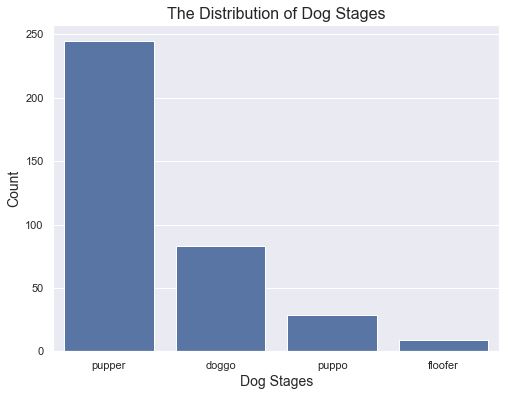

In [268]:
plt.figure(figsize = (8,6))
sorted_stage = dog_ratings.age_category.value_counts().index
sns.countplot(data = dog_ratings, x = 'age_category', color=color, order=sorted_stage)
plt.xlabel("Dog Stages", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("The Distribution of Dog Stages", fontsize=16)
plt.savefig("data/dog_stage_distribution.png")

* First of all there is a huge amount of missing data so, distribution may not reflect the truth.
* Pupper (small, younger doggo) are most popular. May be tey are unmatured and cuter than adult dog.

### Distribution of `source`

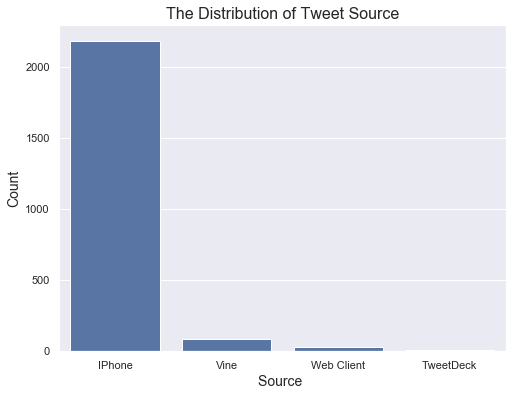

In [269]:
plt.figure(figsize = (8,6))
sorted_stage = dog_tweets_merged_cleaned.source.value_counts().index
sns.countplot(data = dog_tweets_merged_cleaned, x = 'source', color=color, order=sorted_stage)
plt.xlabel("Source ", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("The Distribution of Tweet Source", fontsize=16)
plt.savefig("data/tweet_source_distribution.png")

* Dpminate source of tweets is from iPhone twitter App, which is 94% in total. Twitter app is the main channel for people using to tweet, retweet, post, while TweetDeck is very rare.

### Correlation between `retweet_count` and `favorite_count`

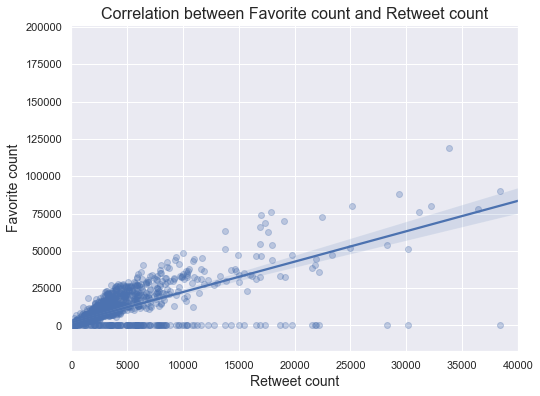

In [271]:
plt.figure(figsize = (8,6))
sns.regplot(data = dog_tweets_merged_cleaned, x="retweet_count", y= "favorite_count", scatter_kws={'alpha':0.3})
plt.xlim(0, 40000)
plt.title("Correlation between Favorite count and Retweet count", fontsize = 16)
plt.xlabel("Retweet count", fontsize = 14)
plt.ylabel("Favorite count", fontsize = 14)
plt.savefig("data/correlation_favorite_retweet_count.png");

* Zoom in more

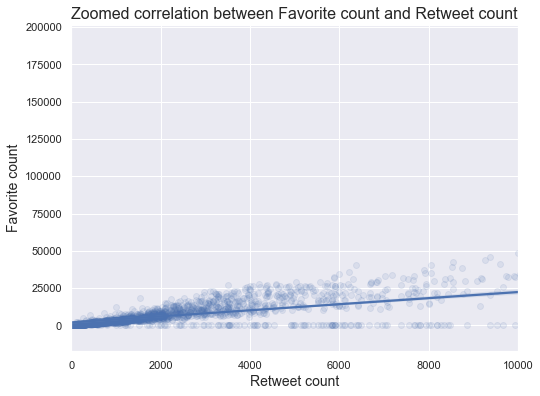

In [272]:
plt.figure(figsize = (8,6))
sns.regplot(data = dog_tweets_merged_cleaned, x="retweet_count", y= "favorite_count", scatter_kws={'alpha':0.1})
plt.xlim(0, 10000)
plt.title("Zoomed correlation between Favorite count and Retweet count", fontsize = 16)
plt.xlabel("Retweet count", fontsize = 14)
plt.ylabel("Favorite count", fontsize = 14)
plt.savefig("data/zoomed_correlation_favorite_retweet_count.png");

In [149]:
merged = pd.merge(dog_tweets_merged_cleaned, dog_ratings, how="inner")

In [150]:
merged.shape

(2319, 11)

In [219]:
dog_tweets_merged_cleaned.retweet_count.corr(dog_tweets_merged_cleaned.favorite_count)

0.7984773566109287

* Correlation between `retweet_count` and `favorite_count` is 0.80, this high value is showing strong positive correlation between those two attributes. Plot also confirms this.

### How accurate is the first dog prediction

In [239]:
first_prediction = dog_prediction_cleaned[dog_prediction_cleaned.prediction_level == 'p1']

In [240]:
first_prediction.is_dog.value_counts()

True     1532
False     543
Name: is_dog, dtype: int64

In [241]:
first_prediction.breed_type.value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: breed_type, dtype: int64

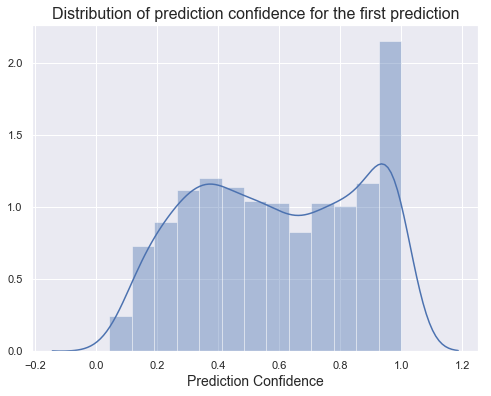

In [273]:
plt.figure(figsize=(8,6));
sns.distplot(first_prediction.prediction_conf);
plt.title("Distribution of prediction confidence for the first prediction", fontsize = 16)
plt.xlabel("Prediction Confidence", fontsize = 14)
plt.savefig("data/first_prediction_conf_dist.png");

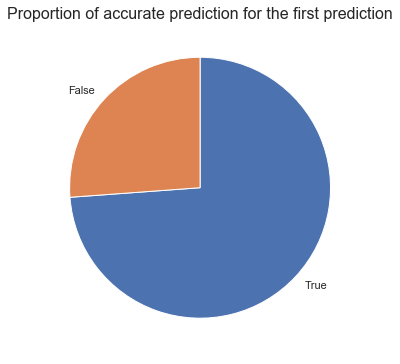

In [275]:
plt.figure(figsize=(8,6));
true_prediction_count = first_prediction.is_dog.value_counts()
plt.pie(true_prediction_count, startangle=90, counterclock=False, labels = true_prediction_count.index);
plt.title("Proportion of accurate prediction for the first prediction", fontsize = 16)
plt.savefig("data/first_prediction_accuracy_pie.png");

* First plot shows distribution of prediction success rate of whether or not first prediction is breed of dog or not.
* Pie chart shows that almost 2/3 times prediction are correct. For neural network model it is not good accuracy.